# Machine Learning Model Building Pipeline



A Machine Learning Model Building Pipeline is a step-by-step process we follow to build a machine learning model correctly and systematically.

 Real ML Pipeline Summary (One Line)

Load → Explore → Clean → Segregate  X and y → Split → Datapreprocissing → Model building → Model Evaluate → Improve → Select → Save → Use

## 1. Problem Understanding
Understand what problem we are solving and why.

In any machine learning experiment, the very first step is to understand and define the problem. Without this clarity, the entire project risks failure.

Example: Predicting Penguin Species
Suppose you want to build a model that predicts the species of a penguin.

Inputs (features):

• 	  beak length

• 	  beak height

Output (target):

• 	  one of the following

categories:

• 	Adelie

• 	Chinstrap

• 	Gentoo

 Since the output is a category (species type) rather than a continuous number, this is a classification problem

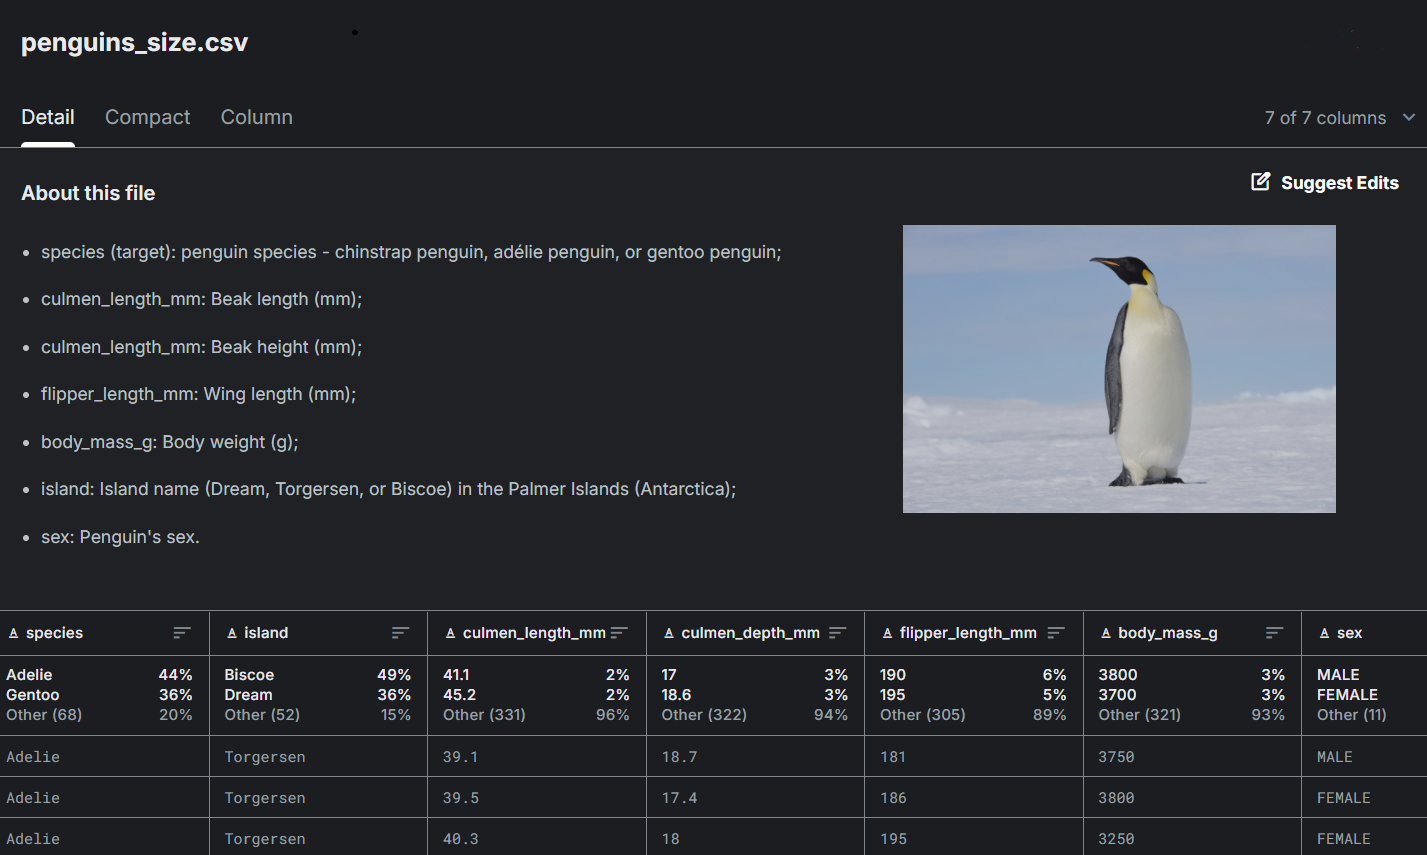

In [ ]:
# Import pandas library for data handling (tables, rows, columns)
import pandas as pd
# Import numpy library for numerical and mathematical operations
import numpy as np
# Import matplotlib for basic data visualization (graphs, charts)
import matplotlib.pyplot as plt
# Import seaborn for advanced and attractive data visualization
import seaborn as sns


* This code is used to prepare tools for data analysis.
* It is commonly written at the start of data science projects.
* Pandas and NumPy handle data and calculations.
* Matplotlib and Seaborn are used to draw graphs.
* The code is correct and follows standard practice.

## 2. Data Collection & Loading
Collect relevant data from reliable sources.

Step 2: Data Collection (Getting the Dataset)
What you do practically:

You already have the dataset (CSV / Excel)

Each row = one penguin

Each column = one measurement

In [ ]:
# Read the CSV file and load it into a pandas DataFrame called 'dataset'
dataset = pd.read_csv('/content/penguins_size.csv')

In [ ]:
# Display the first 5 rows of the dataset to quickly understand the data
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


*   This is your raw experimental data.



## 3. Exploratory Data Analysis (EDA)
Understand data patterns using statistics and plots.

Clean the data: handle missing values, duplicates, and outliers.

* Clean the data
* Explore the Data Distribution of each variable and also identify outliers.
* Explore the Relationships between each pair of Inputs and Output.

Data Cleaning (Very Important)

In [ ]:
# Display a summary of the dataset including column names, data types, and non-null counts
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Observations

* The dataset has missing values, especially in the sex column.

* Numerical columns are in correct format (float64).

* Categorical columns are stored as object.

* Data cleaning (handling missing values) is required before modeling.

* Dataset size is small and manageable.

In [ ]:
# find unique values in each columns
dataset.nunique()

,0
species,3
island,3
culmen_length_mm,164
culmen_depth_mm,80
flipper_length_mm,55
body_mass_g,94
sex,3


In [ ]:
# Replace the unknown category '.' in 'sex' column with NaN
dataset['sex'] = dataset['sex'].replace('.', np.nan)

In [ ]:
dataset.isna().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


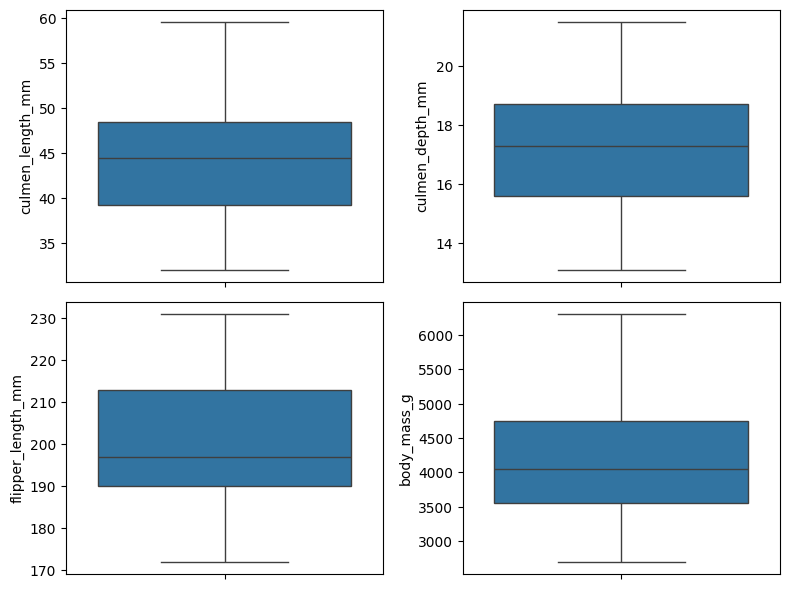

In [ ]:
# Create figure and axes for 2x2 box plots
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
# List of numerical columns to plot
cols = ['culmen_length_mm', 'culmen_depth_mm',
        'flipper_length_mm', 'body_mass_g']
# Flatten axes to loop easily
axes = axes.flatten()
# Create box plots for each column
for i in range(len(cols)):
    sns.boxplot(y=dataset[cols[i]], ax=axes[i])
# Adjust layout
plt.tight_layout()
# Show the figure
plt.show()

* Box plots show that all numerical features are skewed and some contain outliers.

* Since mean is affected by outliers, it is not suitable for missing value handling.

* Median is the best choice for numerical columns because it is robust to skewness.

* The sex column is categorical with 10 missing values, so mode imputation is appropriate.

In [ ]:
# Fill missing values in numerical columns using median
dataset['culmen_length_mm'] = dataset['culmen_length_mm'].fillna(dataset['culmen_length_mm'].median())
dataset['culmen_depth_mm'] = dataset['culmen_depth_mm'].fillna(dataset['culmen_depth_mm'].median())
dataset['flipper_length_mm'] = dataset['flipper_length_mm'].fillna(dataset['flipper_length_mm'].median())
dataset['body_mass_g'] = dataset['body_mass_g'].fillna(dataset['body_mass_g'].median())
# Fill missing values in categorical column using mode
dataset['sex'] = dataset['sex'].fillna(dataset['sex'].mode()[0])

In [ ]:
# Counts the number of duplicate rows in the dataset
dataset.duplicated().sum()

np.int64(0)

**Univariate Analysis**

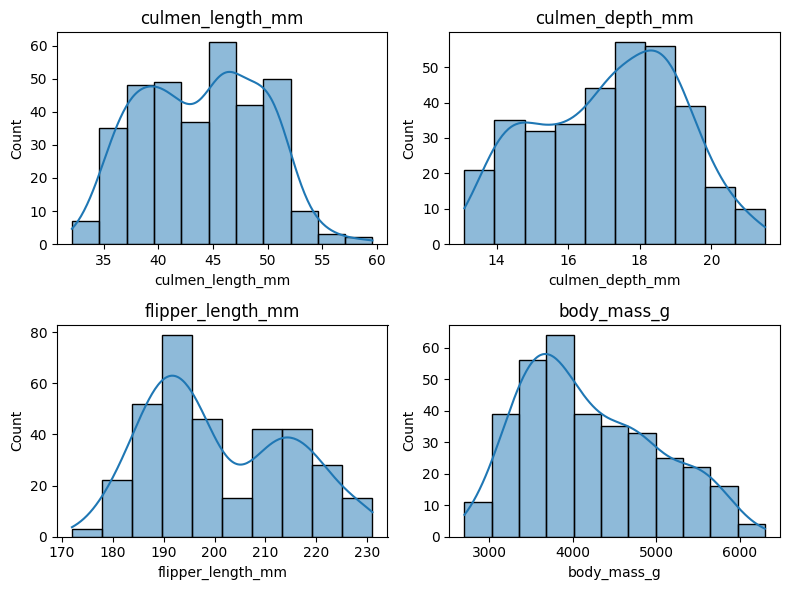

In [ ]:
# List of columns to plot
columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
# Flatten axes array to make it easier to iterate
axes = axes.flatten()
# Loop through each column and plot histogram with KDE
for i, col in enumerate(columns):
    sns.histplot(dataset[col], kde=True, ax=axes[i])
    axes[i].set_title(col)  # optional: add column name as title
# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**observation**
1.   Culmen length shows variation among penguin species, with some having short beaks and others longer beaks.
2.   Culmen depth follows an almost normal distribution and shows less variation compared to other features.
3. Flipper length clearly separates species, with Gentoo penguins having much longer flippers.
4. Body mass varies widely, where heavier penguins are mostly Gentoo and lighter ones are Adélie.


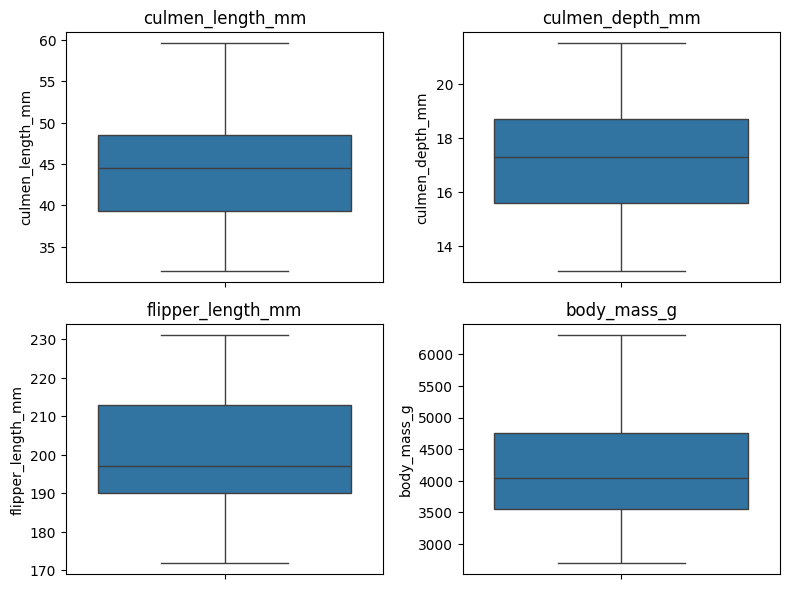

In [ ]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
# Flatten axes array for easy iteration
axes = axes.flatten()
# Loop through each column and plot boxplot
for i, col in enumerate(columns):
    sns.boxplot(data=dataset, y=col, ax=axes[i])
    axes[i].set_title(col)  # optional: add column name as title
# Adjust layout and display
plt.tight_layout()
plt.show()

###Observation:

Culmen length shows moderate spread, with most values lying around the middle range and a few higher and lower extremes.

Culmen depth has a smaller spread, indicating beak depth is more consistent among penguins.

Flipper length shows noticeable variation, suggesting differences between penguin species.

Body mass has a wide range with some high values, indicating clear size differences among penguins.

**Bivariate Analysis**

<Axes: >

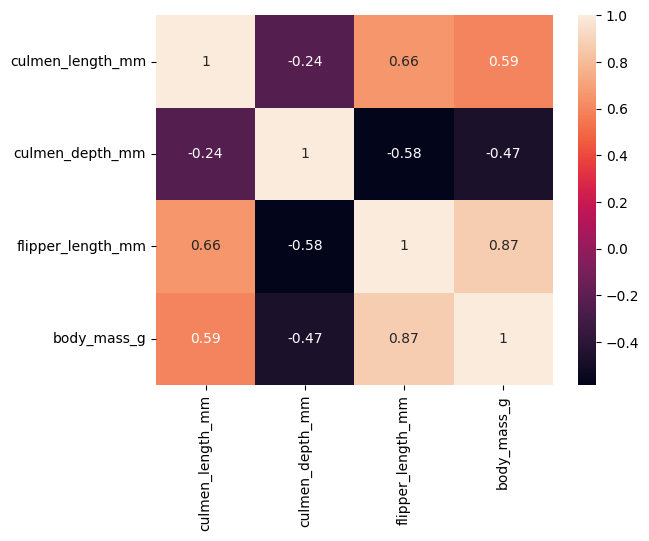

In [ ]:
# Creates a heatmap showing correlation between all numeric columns in the dataset
numeric_cols = dataset.select_dtypes(include=np.number).columns  # select only numeric columns
sns.heatmap(dataset[numeric_cols].corr(), annot=True)  # plot correlation heatmap with values

###Observation:

Flipper length and body mass show a strong positive correlation, meaning heavier penguins tend to have longer flippers.

Culmen length is moderately positively related to both flipper length and body mass.

Culmen depth has a negative correlation with flipper length and body mass, indicating deeper beaks are linked to smaller body size.

The weak negative correlation between culmen length and culmen depth shows these two beak features vary independently.

In [ ]:
# Shows all unique values/categories in the 'species' column
dataset["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

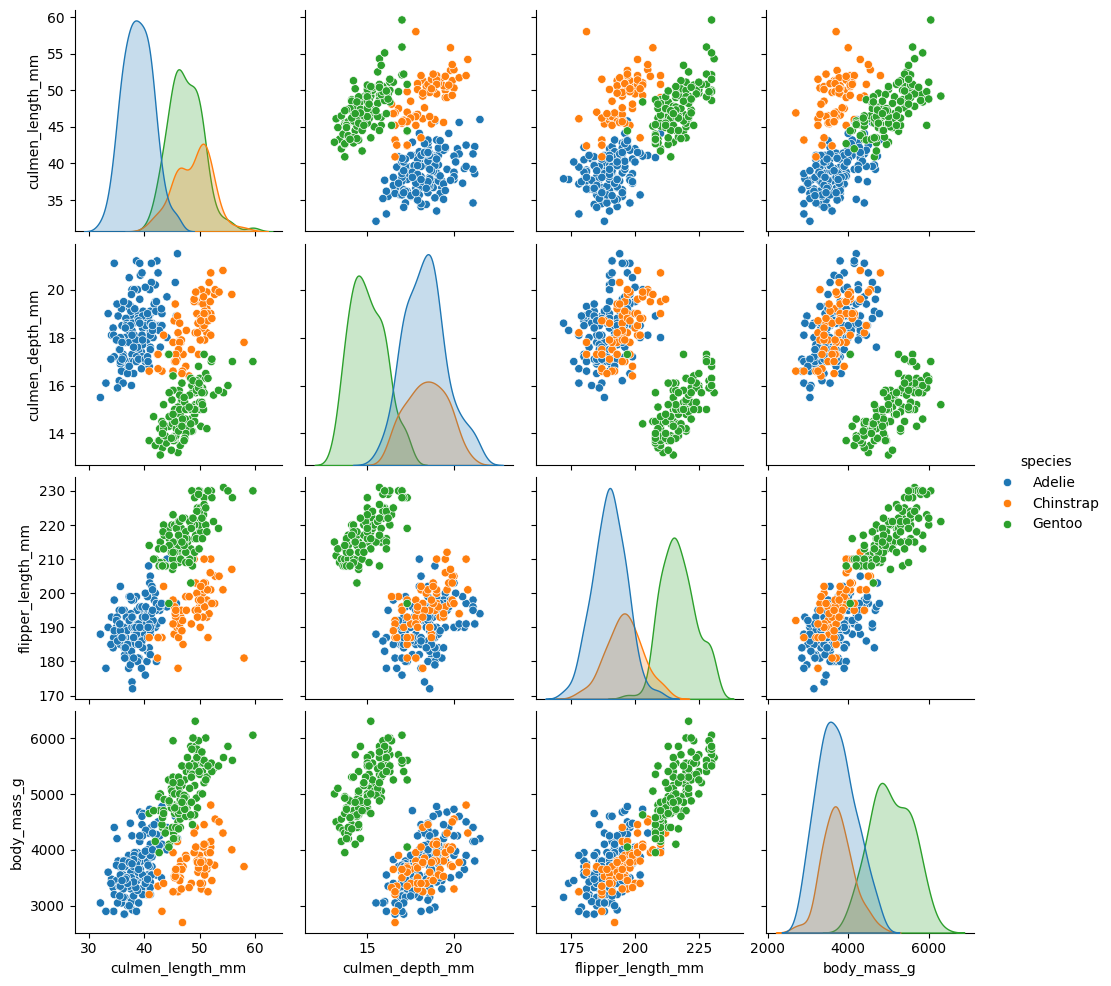

In [ ]:
# Creates a pairplot to visualize relationships between all numeric columns, colored by 'species'
sns.pairplot(dataset, hue='species')

Observation:

Culmen length and culmen depth show clear separation among species, with Adélie, Chinstrap, and Gentoo forming distinct clusters.

Flipper length strongly differentiates species, where Gentoo penguins clearly have the longest flippers.

Body mass increases with flipper length, and Gentoo penguins appear heavier compared to the other two species.

Adélie and Chinstrap penguins show some overlap in beak measurements, but Gentoo remains well separated overall.

## 4. Segregate the Features and Target

* In this step, the dataset is divided into predictor variables (X) and a target variable (y).

* The predictor variables (X) are the physical
* measurements of penguins:

* culmen_length_mm, culmen_depth_mm, flipper_length_mm, and body_mass_g.

* These features are used as inputs to the model.

* The target variable (y) is species, which represents the type of penguin (Adélie, Chinstrap, or Gentoo).

In [ ]:
# Split the dataset into features (X) and target (y)
# X contains all columns except 'species' (used for prediction)
# y contains the target column 'species' that we want to predict
X = dataset.drop('species', axis=1)
y = dataset['species']

In [ ]:
# Shows the dimensions of features (X) and target (y)
# X.shape gives (number of rows, number of features)
# y.shape gives (number of rows,) since it's a single column
X.shape, y.shape

((344, 6), (344,))

##5.Train–Test DataSpliting
* Split the dataset into training and testing sets
 * X_train, y_train → data used to train the model
 * X_test, y_test → data used to test/evaluate the model
* test_size=0.3 → 30% of data is for testing, 70% for training

In [ ]:
from sklearn.model_selection import train_test_split

# random_state=42 → ensures reproducible split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 6), (104, 6), (240,), (104,))

##6.Train Datapreprocissing
* Machine Learning models cannot understand text, so categorical columns like species, island, and sex are converted into numbers using Label Encoding (for example: Male → 1, Female → 0).

* Numerical features have different ranges, such as body_mass_g in thousands and culmen_length_mm in tens.

* If we do not scale them, the model may give more importance to features with larger values.

* So, feature scaling is applied to bring all numerical values to a similar range for fair learning.

In [ ]:
# Identify numeric and categorical columns
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['island', 'sex']  # columns to encode ordinally

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
# Scale numeric columns
scaler = StandardScaler().set_output(transform='pandas')
X_train_num = scaler.fit_transform(X_train[numeric_cols])
# Encode categorical columns
encoder = OrdinalEncoder()
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]),
                           columns=categorical_cols, index=X_train.index)

In [ ]:
#  Combine numeric and categorical columns for training
X_train_transformed = pd.concat([X_train_num, X_train_cat], axis=1)

## 7. Model building
Train the model using training data.



* Since this is a classification problem, classification algorithms like Logistic Regression, Decision Tree, Random Forest, and KNN are used.

* These algorithms learn the relationship between input features and penguin species.
* During model training, the model is trained on the training dataset to find patterns.
* For example, it learns that Gentoo penguins have longer flippers, while Adelie penguins are smaller, and this process is called model fitting.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and train KNN model
# n_neighbors is the 'k' value (default is 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

##8.Test Datapreprocissing
* The scaled numerical features and encoded categorical features of the test data are combined into a single dataset.
* This combined data is given to the trained KNN model to predict the penguin species.
* The model generates predicted labels for each test sample.
* Finally, the shape of the prediction output is checked to confirm that predictions match the test data size.

In [ ]:
# Scale numeric columns in the test set using the same scaler fitted on training data
X_test_num = scaler.transform(X_test[numeric_cols])
# Encode categorical columns in the test set using the same encoder fitted on training data
X_test_cat = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=categorical_cols,  # preserve original column names
    index=X_test.index         # preserve row indices
)

##9.predition on test data

In [ ]:
# Combine numeric and categorical columns for the test set
X_test_transformed = pd.concat([X_test_num, X_test_cat], axis=1)
# Predict species for the test set using the trained Logistic Regression model
y_test_pred = knn.predict(X_test_transformed)
# Check the shape of the predicted labels
y_test_pred.shape

(104,)

## 10. Model Evaluation
Evaluate model performance using metrics.



*   Model Evaluation is done after training by testing the model on unseen test data.
*  Metrics like Accuracy, Precision, Recall, F1-score, and Confusion Matrix are used.
*  These metrics measure how correct and reliable the predictions are.
*  Overall, they show how well the model predicts penguin species.



In [ ]:
from sklearn import metrics
# Calculate the accuracy of the model on the test set
accuracy = metrics.accuracy_score(y_test, y_test_pred)
accuracy

0.9903846153846154

* The accuracy value of 0.9904 (≈ 99%) shows that the model predicts penguin species very accurately.
* This indicates that the selected features (beak size, flipper length, body mass, etc.) are highly effective for classification.
* Only a very small number of test samples were misclassified.
* Overall, the model demonstrates strong and reliable performance on unseen data.
